In [ ]:
## Using the Santander Kaggle Dataset

## updated file that is too big to upload on github: https://colab.research.google.com/drive/1CIj-DoXS0UgyLh00uWstgspgnPiiA_ox?usp=sharing

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import tabulate
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import math

In [ ]:
!pip install -q kaggle

In [ ]:
!python3 -m pip install --upgrade pip

In [ ]:
!ls

 Absence.csv			  USA_cars_datasets.csv
'Completed Assignments'		  Untitled.ipynb
 Housing.csv			  header.csv
 Housing_new.csv		  heart.csv
 Mall_Customers.csv		  sample_submission.csv
 Mall_Customers_no_id.csv	  sorted_training_cancer.csv
 Presence.csv			  test.csv
 Scores_sum.csv			  train_diabetes.csv
'Summer 2024 Kaggle Project'	  training.csv.zip
'Tab_KaggleProject(Good).ipynb'   training_cancer.csv


In [ ]:
!pwd

/root/Data 4380


In [ ]:
!ls -la

total 25992
drwxr-xr-x  5 root root     4096 Jul 26 18:19  .
drwx------ 19 root root     4096 Jul 17 21:18  ..
drwxr-xr-x  2 root root     4096 Jul 26 18:15  .ipynb_checkpoints
-rw-r--r--  1 root root       81 Jun 14 18:02  Absence.csv
drwxr-xr-x  3 root root     4096 Jun 14 19:54 'Completed Assignments'
-rw-r--r--  1 root root    29981 Jun 14 19:29  Housing.csv
-rw-r--r--  1 root root    19779 Jun 14 19:30  Housing_new.csv
-rw-r--r--  1 root root     4286 Jun 14 19:33  Mall_Customers.csv
-rw-r--r--  1 root root     3276 Jun 14 19:34  Mall_Customers_no_id.csv
-rw-r--r--  1 root root       81 Jun 14 18:01  Presence.csv
-rw-r--r--  1 root root        0 Jun 14 19:42  Scores_sum.csv
drwxr-xr-x  4 root root     4096 Jul 17 21:18 'Summer 2024 Kaggle Project'
-rw-r--r--  1 root root    23400 Jul 26 18:19 'Tab_KaggleProject(Good).ipynb'
-rw-r--r--  1 root root   284430 Jun 14 19:22  USA_cars_datasets.csv
-rw-r--r--  1 root root      768 Jun  9 12:45  Untitled.ipynb
-rw-r--r--  1 root root     

In [ ]:
import os

# Step 1: Print the current working directory
print("Current working directory:", os.getcwd())

# Step 2: List the contents of the current directory
print("Contents of current directory:", os.listdir())

# Step 3: Navigate to the 'Summer 2024 Kaggle Project/santander-product-recommendation' directory
try:
    os.chdir("Summer 2024 Kaggle Project/santander-product-recommendation")
    print("Changed directory to 'Summer 2024 Kaggle Project/santander-product-recommendation'")

    # Step 4: List the contents of the target directory
    print("Contents of 'Summer 2024 Kaggle Project/santander-product-recommendation':", os.listdir())
except FileNotFoundError as e:
    print(e)


Current working directory: /root/Data 4380
Contents of current directory: ['sample_submission.csv', 'Housing.csv', 'Summer 2024 Kaggle Project', 'Untitled.ipynb', 'Housing_new.csv', 'Completed Assignments', 'training.csv.zip', 'training_cancer.csv', 'heart.csv', '.ipynb_checkpoints', 'Tab_KaggleProject(Good).ipynb', 'Presence.csv', 'Absence.csv', 'test.csv', 'USA_cars_datasets.csv', 'header.csv', 'Scores_sum.csv', 'train_diabetes.csv', 'Mall_Customers_no_id.csv', 'sorted_training_cancer.csv', 'Mall_Customers.csv']
Changed directory to 'Summer 2024 Kaggle Project/santander-product-recommendation'
Contents of 'Summer 2024 Kaggle Project/santander-product-recommendation': ['train_ver2(spr).csv.zip', 'santander-product-recommendation.zip', '.ipynb_checkpoints', 'test_ver2(spr).csv.zip', 'sample_submission(spr).csv.zip']


In [ ]:
pwd

'/root/Data 4380/Summer 2024 Kaggle Project/santander-product-recommendation'

In [ ]:
!ls

'sample_submission(spr).csv.zip'       'test_ver2(spr).csv.zip'
 santander-product-recommendation.zip  'train_ver2(spr).csv.zip'


In [ ]:
df= pd.read_csv('train_ver2(spr).csv.zip', nrows=10000)

print(df.head)

<bound method NDFrame.head of       fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
0     2015-01-28   1375586            N              ES    H   35  2015-01-12   
1     2015-01-28   1050611            N              ES    V   23  2012-08-10   
2     2015-01-28   1050612            N              ES    V   23  2012-08-10   
3     2015-01-28   1050613            N              ES    H   22  2012-08-10   
4     2015-01-28   1050614            N              ES    V   23  2012-08-10   
...          ...       ...          ...             ...  ...  ...         ...   
9995  2015-01-28   1065716            N              ES    V   27  2012-09-24   
9996  2015-01-28   1065717            N              ES    V   24  2012-09-24   
9997  2015-01-28   1065719            N              ES    H   23  2012-09-24   
9998  2015-01-28   1065649            N              ES    H   30  2012-09-24   
9999  2015-01-28   1065648            N              ES    H   24  2012-09-24  

In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({'Column': missing_percentage.index, 'Missing Percentage': missing_percentage.values})

missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False)

print(missing_df)

                   Column  Missing Percentage
15               conyuemp              100.00
10         ult_fec_cli_1t               99.88
22                  renta               18.99
19               cod_prov                0.54
20                nomprov                0.54
7               ind_nuevo                0.50
3         pais_residencia                0.50
2            ind_empleado                0.50
13                indresi                0.50
12            tiprel_1mes                0.50
14                 indext                0.50
9                  indrel                0.50
16          canal_entrada                0.50
11            indrel_1mes                0.50
6              fecha_alta                0.50
4                    sexo                0.50
18                tipodom                0.50
17                indfall                0.50
21  ind_actividad_cliente                0.50
23               segmento                0.50
46      ind_nom_pens_ult1         

In [ ]:
### Will drop the first 2 columns because the % of missing is too high...
## Might translate the columns to save time switching tabs

In [ ]:
## df1 aka dropping the nan columns...

columns_to_drop = ['conyuemp', 'ult_fec_cli_1t']
df1 = df.drop(columns=columns_to_drop)

print(df1.head())


   fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
0  2015-01-28   1375586            N              ES    H   35  2015-01-12   
1  2015-01-28   1050611            N              ES    V   23  2012-08-10   
2  2015-01-28   1050612            N              ES    V   23  2012-08-10   
3  2015-01-28   1050613            N              ES    H   22  2012-08-10   
4  2015-01-28   1050614            N              ES    V   23  2012-08-10   

   ind_nuevo antiguedad  indrel  ...  ind_hip_fin_ult1 ind_plan_fin_ult1  \
0        0.0          6     1.0  ...                 0                 0   
1        0.0         35     1.0  ...                 0                 0   
2        0.0         35     1.0  ...                 0                 0   
3        0.0         35     1.0  ...                 0                 0   
4        0.0         35     1.0  ...                 0                 0   

  ind_pres_fin_ult1 ind_reca_fin_ult1 ind_tjcr_fin_ult1 ind_valo_fin_ult1 

In [ ]:
# Dropped also the unnessary columns like the ID and province since we have other columns that are specific,
# like rent can tell more about the cost of living more.
# There's also columns stating whether they are foreign or not and their primary address.

In [ ]:
num_features = len(df1.columns)

numerical_features = []
categorical_features = []

for column in df1.columns:
    if df1[column].dtype == 'object':
        categorical_features.append(column)
    else:
        numerical_features.append(column)

print(f"Number of features: {num_features}")
print("\nNumerical Features:")
print(numerical_features)
print("\nCategorical Features:")
print(categorical_features)


Number of features: 46

Numerical Features:
['ncodpers', 'ind_nuevo', 'indrel', 'indrel_1mes', 'tipodom', 'cod_prov', 'ind_actividad_cliente', 'renta', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

Categorical Features:
['fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'antiguedad', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'segmento']


In [ ]:
# The age (Age) and antiguedad (Customer seniority in months) are numerical based on the description
# but they were counted as categorical... I feel like it is important so I am going to keep it

In [ ]:
### changing the age and customer seniority to numerical features...

if 'age' in categorical_features:
    categorical_features.remove('age')
    numerical_features.append('age')
if 'antiguedad' in categorical_features:
    categorical_features.remove('antiguedad')
    numerical_features.append('antiguedad')

print(f"Number of features: {num_features}")
print("\nNumerical Features:")
print(numerical_features)
print("\nCategorical Features:")
print(categorical_features)

Number of features: 46

Numerical Features:
['ncodpers', 'ind_nuevo', 'indrel', 'indrel_1mes', 'tipodom', 'cod_prov', 'ind_actividad_cliente', 'renta', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1', 'age', 'antiguedad']

Categorical Features:
['fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo', 'fecha_alta', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'segmento']


In [ ]:
## just want to check if the numerical features have only numbers before I proceed
numerical_df1 = df1[numerical_features]
print(numerical_df1.head())

   ncodpers  ind_nuevo  indrel  indrel_1mes  tipodom  cod_prov  \
0   1375586        0.0     1.0          1.0      1.0      29.0   
1   1050611        0.0     1.0          1.0      1.0      13.0   
2   1050612        0.0     1.0          1.0      1.0      13.0   
3   1050613        0.0     1.0          1.0      1.0      50.0   
4   1050614        0.0     1.0          1.0      1.0      50.0   

   ind_actividad_cliente      renta  ind_ahor_fin_ult1  ind_aval_fin_ult1  \
0                    1.0   87218.10                  0                  0   
1                    0.0   35548.74                  0                  0   
2                    0.0  122179.11                  0                  0   
3                    0.0  119775.54                  0                  0   
4                    1.0        NaN                  0                  0   

   ...  ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  \
0  ...                  0                  0                  0   
1  ...

In [ ]:
## checking smallest and largest value of each column

feature_min_max = numerical_df1.agg(['min', 'max'])

print("Smallest and Largest Values of Numerical Features:\n")

print(feature_min_max)

Smallest and Largest Values of Numerical Features:

     ncodpers  ind_nuevo  indrel  indrel_1mes  tipodom  cod_prov  \
min   1042162        0.0     1.0          1.0      1.0       1.0   
max   1375586        1.0    99.0          1.0      1.0      52.0   

     ind_actividad_cliente       renta  ind_ahor_fin_ult1  ind_aval_fin_ult1  \
min                    0.0     8034.15                  0                  0   
max                    1.0  5649552.45                  0                  0   

     ...  ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  \
min  ...                  0                  0                  0   
max  ...                  1                  1                  1   

     ind_valo_fin_ult1  ind_viv_fin_ult1  ind_nomina_ult1  ind_nom_pens_ult1  \
min                  0                 0              0.0                0.0   
max                  1                 0              1.0                1.0   

     ind_recibo_ult1  age  antiguedad  
min          

In [ ]:
### The range for their respectable categories makes sense based on their description, but the
# antiguedad aka Customer seniority (in months), the min is -999999.0
# I'm going to change all the negatives to zeros in this column...

df1['antiguedad'] = pd.to_numeric(df1['antiguedad'], errors='coerce')

df1['antiguedad'] = df1['antiguedad'].apply(lambda x: max(0, x))

print(df1['antiguedad'])

0        6.0
1       35.0
2       35.0
3       35.0
4       35.0
        ... 
9995    34.0
9996    34.0
9997    34.0
9998    34.0
9999    34.0
Name: antiguedad, Length: 10000, dtype: float64


In [ ]:
print("Minimum value of 'antiguedad':", df1['antiguedad'].min())
print("Maximum value of 'antiguedad':", df1['antiguedad'].max())

Minimum value of 'antiguedad': 0.0
Maximum value of 'antiguedad': 35.0


In [ ]:
## Max is 35 months and min is 0 months

In [ ]:
### Checking the categorical only has letters and not numbers

In [ ]:
categorical_df1= df1[categorical_features]
print(categorical_df1.head())

   fecha_dato ind_empleado pais_residencia sexo  fecha_alta tiprel_1mes  \
0  2015-01-28            N              ES    H  2015-01-12           A   
1  2015-01-28            N              ES    V  2012-08-10           I   
2  2015-01-28            N              ES    V  2012-08-10           I   
3  2015-01-28            N              ES    H  2012-08-10           I   
4  2015-01-28            N              ES    V  2012-08-10           A   

  indresi indext canal_entrada indfall      nomprov            segmento  
0       S      N           KHL       N       MALAGA   02 - PARTICULARES  
1       S      S           KHE       N  CIUDAD REAL  03 - UNIVERSITARIO  
2       S      N           KHE       N  CIUDAD REAL  03 - UNIVERSITARIO  
3       S      N           KHD       N     ZARAGOZA  03 - UNIVERSITARIO  
4       S      N           KHE       N     ZARAGOZA  03 - UNIVERSITARIO  


In [ ]:
print(df1.head())

   fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
0  2015-01-28   1375586            N              ES    H   35  2015-01-12   
1  2015-01-28   1050611            N              ES    V   23  2012-08-10   
2  2015-01-28   1050612            N              ES    V   23  2012-08-10   
3  2015-01-28   1050613            N              ES    H   22  2012-08-10   
4  2015-01-28   1050614            N              ES    V   23  2012-08-10   

   ind_nuevo  antiguedad  indrel  ...  ind_hip_fin_ult1 ind_plan_fin_ult1  \
0        0.0         6.0     1.0  ...                 0                 0   
1        0.0        35.0     1.0  ...                 0                 0   
2        0.0        35.0     1.0  ...                 0                 0   
3        0.0        35.0     1.0  ...                 0                 0   
4        0.0        35.0     1.0  ...                 0                 0   

  ind_pres_fin_ult1 ind_reca_fin_ult1 ind_tjcr_fin_ult1 ind_valo_fin

In [ ]:
print("Updated Categorical Features:")
print(categorical_features)

Updated Categorical Features:
['fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo', 'fecha_alta', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'segmento']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df1[numerical_features].describe())

           ncodpers    ind_nuevo       indrel  indrel_1mes  tipodom  \
count  1.000000e+04  9950.000000  9950.000000       9950.0   9950.0   
mean   1.049352e+06     0.000402     1.118191          1.0      1.0   
std    5.917693e+03     0.020047     3.401457          0.0      0.0   
min    1.042162e+06     0.000000     1.000000          1.0      1.0   
25%    1.045408e+06     0.000000     1.000000          1.0      1.0   
50%    1.048608e+06     0.000000     1.000000          1.0      1.0   
75%    1.052755e+06     0.000000     1.000000          1.0      1.0   
max    1.375586e+06     1.000000    99.000000          1.0      1.0   

          cod_prov  ind_actividad_cliente         renta  ind_ahor_fin_ult1  \
count  9946.000000            9950.000000  8.101000e+03            10000.0   
mean     24.485622               0.420000  1.098319e+05                0.0   
std      14.730467               0.493583  1.074766e+05                0.0   
min       1.000000               0.000000  8.034

In [ ]:
## Missing values and outliers

missing_values_count = df1.isnull().sum()
missing_values_count_sorted = missing_values_count.sort_values(ascending=False)

outliers = df1.describe().transpose()

print("Missing Values Count (Sorted):")
print(missing_values_count_sorted)

print("\nPotential Outliers:")
print(outliers)

Missing Values Count (Sorted):
renta                    1899
cod_prov                   54
nomprov                    54
sexo                       50
pais_residencia            50
ind_empleado               50
indresi                    50
tiprel_1mes                50
indext                     50
indrel_1mes                50
canal_entrada              50
indrel                     50
ind_nuevo                  50
fecha_alta                 50
tipodom                    50
indfall                    50
ind_actividad_cliente      50
segmento                   50
ind_nom_pens_ult1          11
ind_nomina_ult1            11
ncodpers                    0
age                         0
antiguedad                  0
fecha_dato                  0
ind_ahor_fin_ult1           0
ind_aval_fin_ult1           0
ind_cno_fin_ult1            0
ind_ctju_fin_ult1           0
ind_cco_fin_ult1            0
ind_cder_fin_ult1           0
ind_ctop_fin_ult1           0
ind_ctma_fin_ult1           0
ind_ctpp_

In [ ]:
### An interesting pattern was the columns that had missing values also
## had the same AMOUNT of missing values

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Concatenate the one-hot encoded target columns
target_columns = df1.columns[df1.columns.str.startswith('ind_')].tolist()
target_df1 = df1[target_columns]

# Convert one-hot encoded vectors to label encodings
for column in target_df1.columns:
    target_df1.loc[:, column] = label_encoder.fit_transform(target_df1[column])

# Sum the encoded values across columns to represent the new column
target_df1['checked_services'] = target_df1.sum(axis=1)

# Create user-item interaction matrix without 'ncodpers' column
user_item_matrix = target_df1.copy()

# Display the user-item interaction matrix
print("User-Item Interaction Matrix:")
print(user_item_matrix.head())

User-Item Interaction Matrix:
  ind_empleado  ind_nuevo  ind_actividad_cliente  ind_ahor_fin_ult1  \
0            0        0.0                    1.0                  0   
1            0        0.0                    0.0                  0   
2            0        0.0                    0.0                  0   
3            0        0.0                    0.0                  0   
4            0        0.0                    1.0                  0   

   ind_aval_fin_ult1  ind_cco_fin_ult1  ind_cder_fin_ult1  ind_cno_fin_ult1  \
0                  0                 1                  0                 0   
1                  0                 1                  0                 0   
2                  0                 1                  0                 0   
3                  0                 0                  0                 0   
4                  0                 1                  0                 0   

   ind_ctju_fin_ult1  ind_ctma_fin_ult1  ...  ind_plan_fin_ult1  \
0

/tmp/ipykernel_1085/3131137162.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df1['checked_services'] = target_df1.sum(axis=1)


In [ ]:
## visualize it

from tabulate import tabulate

print("User-Item Interaction Matrix:")
print(tabulate(user_item_matrix.head(), headers='keys', tablefmt='pretty'))


User-Item Interaction Matrix:
+---+--------------+-----------+-----------------------+-------------------+-------------------+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-----------------+-------------------+-----------------+------------------+
|   | ind_empleado | ind_nuevo | ind_actividad_cliente | ind_ahor_fin_ult1 | ind_aval_fin_ult1 | ind_cco_fin_ult1 | ind_cder_fin_ult1 | ind_cno_fin_ult1 | ind_ctju_fin_ult1 | ind_ctma_fin_ult1 | ind_ctop_fin_ult1 | ind_ctpp_fin_ult1 | ind_deco_fin_ult1 | ind_deme_fin_ult1 | ind_dela_fin_ult1 | ind_ecue_fin_ult1 | ind_fond_fin_ult1 | ind_hip_fin_ult1 | ind_plan_fin_ult1 | ind_pres_fin_ult1 | ind_reca_fin_ult1 | ind_tjcr

In [ ]:
df1['checked_services'] = target_df1['checked_services']

print(df1.head())
print(df1.columns)

   fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
0  2015-01-28   1375586            N              ES    H   35  2015-01-12   
1  2015-01-28   1050611            N              ES    V   23  2012-08-10   
2  2015-01-28   1050612            N              ES    V   23  2012-08-10   
3  2015-01-28   1050613            N              ES    H   22  2012-08-10   
4  2015-01-28   1050614            N              ES    V   23  2012-08-10   

   ind_nuevo  antiguedad  indrel  ...  ind_plan_fin_ult1 ind_pres_fin_ult1  \
0        0.0         6.0     1.0  ...                  0                 0   
1        0.0        35.0     1.0  ...                  0                 0   
2        0.0        35.0     1.0  ...                  0                 0   
3        0.0        35.0     1.0  ...                  0                 0   
4        0.0        35.0     1.0  ...                  0                 0   

  ind_reca_fin_ult1 ind_tjcr_fin_ult1 ind_valo_fin_ult1 ind_vi

In [ ]:
## Might remove the consumers who were below the mean of buying products
# but to consider the ones who bought less, I will do 4

In [ ]:
threshold = 4

new_df = df1[df1['checked_services'] > threshold]

print("Shape of filtered DataFrame:\n", new_df.shape)

print("\nNew Dataset:")
print(new_df.head())

Shape of filtered DataFrame:
 (274, 47)

New Dataset:
     fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
68   2015-01-28   1050651            N              ES    H   30  2012-08-10   
69   2015-01-28   1050652            N              ES    H   31  2012-08-10   
72   2015-01-28   1050659            N              ES    V   39  2012-08-10   
121  2015-01-28   1050565            N              ES    H   33  2012-08-10   
187  2015-01-28   1050869            N              ES    V   31  2012-08-10   

     ind_nuevo  antiguedad  indrel  ...  ind_plan_fin_ult1 ind_pres_fin_ult1  \
68         0.0        35.0     1.0  ...                  0                 0   
69         0.0        35.0     1.0  ...                  0                 0   
72         0.0        35.0     1.0  ...                  0                 0   
121        0.0        35.0     1.0  ...                  0                 0   
187        0.0        35.0     1.0  ...                  0       

In [ ]:
new_df = new_df.copy()
new_df['checked_services'] = pd.to_numeric(new_df['checked_services'], errors='coerce')

# Convert 'age' column to numerical
new_df['age'] = pd.to_numeric(new_df['age'], errors='coerce')

new_num_feat = new_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
new_cat_feat = new_df.select_dtypes(include=['object']).columns.tolist()

new_numerical_features = len(new_num_feat)
new_categorical_features = len(new_cat_feat)

print("Numerical Features ({}):".format(new_numerical_features))
print(new_num_feat)
print("\nCategorical Features ({}):".format(new_categorical_features))
print(new_cat_feat)

Numerical Features (35):
['ncodpers', 'age', 'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes', 'tipodom', 'cod_prov', 'ind_actividad_cliente', 'renta', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1', 'checked_services']

Categorical Features (12):
['fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo', 'fecha_alta', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'segmento']


In [ ]:
### Feature Engineering...

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 3.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 2.8 MB/s eta 0:00:00:00:0100:01


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb

# Assuming new_df is your DataFrame with missing values
# Check for missing values before imputation
print("Number of missing values before imputation:")
print(new_df.isnull().sum())

# Define XGBoost model
xgb_model = xgb.XGBRegressor()

# Define features and target variable
X = new_df[new_num_feat].values  # Convert to numpy array
y = new_df['checked_services'].values  # Replace 'checked_services' with your target variable

# Train the model
xgb_model.fit(X, y)  # Make sure to include the target variable

# Use the trained model to predict missing values
imputed_values = xgb_model.predict(X)

# Replace missing values in your dataframe
new_df[new_num_feat] = np.where(new_df[new_num_feat].isnull(), imputed_values.reshape(-1, 1), new_df[new_num_feat])

# Check for missing values after imputation
print("\nNumber of missing values after imputation:")
print(new_df.isnull().sum())

Number of missing values before imputation:
fecha_dato                0
ncodpers                  0
ind_empleado             50
pais_residencia          50
sexo                     50
age                      50
fecha_alta               50
ind_nuevo                50
antiguedad                0
indrel                   50
indrel_1mes              50
tiprel_1mes              50
indresi                  50
indext                   50
canal_entrada            50
indfall                  50
tipodom                  50
cod_prov                 51
nomprov                  51
ind_actividad_cliente    50
renta                    87
segmento                 50
ind_ahor_fin_ult1         0
ind_aval_fin_ult1         0
ind_cco_fin_ult1          0
ind_cder_fin_ult1         0
ind_cno_fin_ult1          0
ind_ctju_fin_ult1         0
ind_ctma_fin_ult1         0
ind_ctop_fin_ult1         0
ind_ctpp_fin_ult1         0
ind_deco_fin_ult1         0
ind_deme_fin_ult1         0
ind_dela_fin_ult1         0
ind_

In [ ]:
## XBG fixed some of the missing values, the columns that did not are okay because they are categorical.
# And not as important aka the (pais_residencia = Customer's Country residence).
# I will prioritize the important columns that have zero nan like the rent, age, etc

In [ ]:
# To fill the missing values in age because I feel like this is good info for the objective,
# using the Customer seniority (antiguedad).
# Older customers can have higher seniority, just due to age.
# Older ones can have a higher chance of financial stability,
# than a young adult in college...

In [ ]:
# Fill missing age values using customer seniority (antiguedad)
# Calculate the mean age for each unique value of customer seniority
age_mean_by_seniority = new_df.groupby('antiguedad')['age'].mean()

# Check if there are any missing values in the age column
if new_df['age'].isnull().sum() == 0:
    print("No missing values in the 'age' column.")
else:
    # Fill missing age values with the mean age corresponding to the customer's seniority
    new_df['age'] = new_df.apply(lambda row: age_mean_by_seniority[row['antiguedad']] if np.isnan(row['age']) else row['age'], axis=1)


No missing values in the 'age' column.


In [ ]:
## Test Set Preprocessong

In [ ]:
df_test = pd.read_csv('train_ver2(spr).csv.zip', nrows=10000)
print(df_test.head())

   fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
0  2015-01-28   1375586            N              ES    H   35  2015-01-12   
1  2015-01-28   1050611            N              ES    V   23  2012-08-10   
2  2015-01-28   1050612            N              ES    V   23  2012-08-10   
3  2015-01-28   1050613            N              ES    H   22  2012-08-10   
4  2015-01-28   1050614            N              ES    V   23  2012-08-10   

   ind_nuevo antiguedad  indrel  ... ind_hip_fin_ult1  ind_plan_fin_ult1  \
0        0.0          6     1.0  ...                0                  0   
1        0.0         35     1.0  ...                0                  0   
2        0.0         35     1.0  ...                0                  0   
3        0.0         35     1.0  ...                0                  0   
4        0.0         35     1.0  ...                0                  0   

  ind_pres_fin_ult1 ind_reca_fin_ult1 ind_tjcr_fin_ult1  ind_valo_fin_ult1

In [ ]:
missing_p = (df_test.isnull().sum() / len(df_test)) * 100

missing_dft = pd.DataFrame({'Column': missing_p.index, 'Missing Percentage': missing_p.values})

missing_dft = missing_df.sort_values(by='Missing Percentage', ascending=False)

print(missing_dft)

                   Column  Missing Percentage
15               conyuemp              100.00
10         ult_fec_cli_1t               99.88
22                  renta               18.99
19               cod_prov                0.54
20                nomprov                0.54
7               ind_nuevo                0.50
3         pais_residencia                0.50
2            ind_empleado                0.50
13                indresi                0.50
12            tiprel_1mes                0.50
14                 indext                0.50
9                  indrel                0.50
16          canal_entrada                0.50
11            indrel_1mes                0.50
6              fecha_alta                0.50
4                    sexo                0.50
18                tipodom                0.50
17                indfall                0.50
21  ind_actividad_cliente                0.50
23               segmento                0.50
46      ind_nom_pens_ult1         

In [ ]:
columns_to_drop = ['conyuemp', 'ult_fec_cli_1t']
df_test1 = df_test.drop(columns=columns_to_drop)

print(df_test1.head())

   fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
0  2015-01-28   1375586            N              ES    H   35  2015-01-12   
1  2015-01-28   1050611            N              ES    V   23  2012-08-10   
2  2015-01-28   1050612            N              ES    V   23  2012-08-10   
3  2015-01-28   1050613            N              ES    H   22  2012-08-10   
4  2015-01-28   1050614            N              ES    V   23  2012-08-10   

   ind_nuevo antiguedad  indrel  ...  ind_hip_fin_ult1 ind_plan_fin_ult1  \
0        0.0          6     1.0  ...                 0                 0   
1        0.0         35     1.0  ...                 0                 0   
2        0.0         35     1.0  ...                 0                 0   
3        0.0         35     1.0  ...                 0                 0   
4        0.0         35     1.0  ...                 0                 0   

  ind_pres_fin_ult1 ind_reca_fin_ult1 ind_tjcr_fin_ult1 ind_valo_fin_ult1 

In [ ]:
nf = len(df_test1.columns)

n_features = []
c_features = []

for column in df_test1.columns:
    if df_test1[column].dtype == 'object':
        c_features.append(column)
    else:
        n_features.append(column)

print(f"Number of features: {nf}")
print("\nNumerical Features:")
print(n_features)
print("\nCategorical Features:")
print(c_features)

Number of features: 46

Numerical Features:
['ncodpers', 'ind_nuevo', 'indrel', 'indrel_1mes', 'tipodom', 'cod_prov', 'ind_actividad_cliente', 'renta', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

Categorical Features:
['fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'antiguedad', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'segmento']


In [ ]:
## Rent has numbers, so switching it to numerical

if 'renta' in c_features:
    c_features.remove('renta')
    n_features.append('renta')

print(f"Number of features: {nf}")
print("\nNumerical Features:")
print(n_features)
print("\nCategorical Features:")
print(c_features)

Number of features: 46

Numerical Features:
['ncodpers', 'ind_nuevo', 'indrel', 'indrel_1mes', 'tipodom', 'cod_prov', 'ind_actividad_cliente', 'renta', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

Categorical Features:
['fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'antiguedad', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'segmento']


In [ ]:
numerical_df_test1 = df_test1[n_features]
print(numerical_df_test1.head())

   ncodpers  ind_nuevo  indrel  indrel_1mes  tipodom  cod_prov  \
0   1375586        0.0     1.0          1.0      1.0      29.0   
1   1050611        0.0     1.0          1.0      1.0      13.0   
2   1050612        0.0     1.0          1.0      1.0      13.0   
3   1050613        0.0     1.0          1.0      1.0      50.0   
4   1050614        0.0     1.0          1.0      1.0      50.0   

   ind_actividad_cliente      renta  ind_ahor_fin_ult1  ind_aval_fin_ult1  \
0                    1.0   87218.10                  0                  0   
1                    0.0   35548.74                  0                  0   
2                    0.0  122179.11                  0                  0   
3                    0.0  119775.54                  0                  0   
4                    1.0        NaN                  0                  0   

   ...  ind_hip_fin_ult1  ind_plan_fin_ult1  ind_pres_fin_ult1  \
0  ...                 0                  0                  0   
1  ...  

In [ ]:
df_test1['antiguedad'] = pd.to_numeric(df_test1['antiguedad'], errors='coerce')

df_test1['antiguedad'] = df_test1['antiguedad'].apply(lambda x: max(0, x))

print(df_test1['antiguedad'])

0        6.0
1       35.0
2       35.0
3       35.0
4       35.0
        ... 
9995    34.0
9996    34.0
9997    34.0
9998    34.0
9999    34.0
Name: antiguedad, Length: 10000, dtype: float64


In [ ]:
print("Minimum value of 'antiguedad':", df_test1['antiguedad'].min())
print("Maximum value of 'antiguedad':", df_test1['antiguedad'].max())

Minimum value of 'antiguedad': 0.0
Maximum value of 'antiguedad': 35.0


In [ ]:
categorical_df_test1= df_test1[c_features]
print(categorical_df_test1.head())

   fecha_dato ind_empleado pais_residencia sexo  age  fecha_alta  antiguedad  \
0  2015-01-28            N              ES    H   35  2015-01-12         6.0   
1  2015-01-28            N              ES    V   23  2012-08-10        35.0   
2  2015-01-28            N              ES    V   23  2012-08-10        35.0   
3  2015-01-28            N              ES    H   22  2012-08-10        35.0   
4  2015-01-28            N              ES    V   23  2012-08-10        35.0   

  tiprel_1mes indresi indext canal_entrada indfall      nomprov  \
0           A       S      N           KHL       N       MALAGA   
1           I       S      S           KHE       N  CIUDAD REAL   
2           I       S      N           KHE       N  CIUDAD REAL   
3           I       S      N           KHD       N     ZARAGOZA   
4           A       S      N           KHE       N     ZARAGOZA   

             segmento  
0   02 - PARTICULARES  
1  03 - UNIVERSITARIO  
2  03 - UNIVERSITARIO  
3  03 - UNIVERSITARI

In [ ]:
print("\nCategorical Features:")
print(c_features)


Categorical Features:
['fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'antiguedad', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'segmento']


In [ ]:
missing_count = df_test1.isnull().sum()
missing_count_sorted = missing_count.sort_values(ascending=False)

outliers_df_test1 = df_test1.describe().transpose()

print("Missing Values Count (Sorted):")
print(missing_count_sorted)

print("\nPotential Outliers:")
print(outliers_df_test1)


Missing Values Count (Sorted):
renta                    1899
cod_prov                   54
nomprov                    54
sexo                       50
pais_residencia            50
ind_empleado               50
indresi                    50
tiprel_1mes                50
indext                     50
indrel_1mes                50
canal_entrada              50
indrel                     50
ind_nuevo                  50
fecha_alta                 50
tipodom                    50
indfall                    50
ind_actividad_cliente      50
segmento                   50
ind_nom_pens_ult1          11
ind_nomina_ult1            11
ncodpers                    0
age                         0
antiguedad                  0
fecha_dato                  0
ind_ahor_fin_ult1           0
ind_aval_fin_ult1           0
ind_cno_fin_ult1            0
ind_ctju_fin_ult1           0
ind_cco_fin_ult1            0
ind_cder_fin_ult1           0
ind_ctop_fin_ult1           0
ind_ctma_fin_ult1           0
ind_ctpp_

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Concatenate the one-hot encoded target columns
target_cols = df_test1.columns[df_test1.columns.str.startswith('ind_')].tolist()
target_df_test1 = df_test1[target_cols]

# Convert one-hot encoded vectors to label encodings
for column in target_df_test1.columns:
    target_df_test1.loc[:, column] = label_encoder.fit_transform(target_df_test1[column])

# Sum the encoded values across columns to represent the new column
target_df_test1['checked_services'] = target_df_test1.sum(axis=1)

# Create user-item interaction matrix without 'ncodpers' column
user_product_matrix = target_df_test1.copy()

# Display the user-item interaction matrix
print("User-Item Interaction Matrix (Test):")
print(user_product_matrix.head())

User-Item Interaction Matrix (Test):
  ind_empleado  ind_nuevo  ind_actividad_cliente  ind_ahor_fin_ult1  \
0            0        0.0                    1.0                  0   
1            0        0.0                    0.0                  0   
2            0        0.0                    0.0                  0   
3            0        0.0                    0.0                  0   
4            0        0.0                    1.0                  0   

   ind_aval_fin_ult1  ind_cco_fin_ult1  ind_cder_fin_ult1  ind_cno_fin_ult1  \
0                  0                 1                  0                 0   
1                  0                 1                  0                 0   
2                  0                 1                  0                 0   
3                  0                 0                  0                 0   
4                  0                 1                  0                 0   

   ind_ctju_fin_ult1  ind_ctma_fin_ult1  ...  ind_plan_fin_ul

/tmp/ipykernel_1085/3961882493.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df_test1['checked_services'] = target_df_test1.sum(axis=1)


In [ ]:
## visualize it

from tabulate import tabulate

print("User-Item Interaction Matrix (Test):")
print(tabulate(user_product_matrix.head(), headers='keys', tablefmt='pretty'))

User-Item Interaction Matrix (Test):
+---+--------------+-----------+-----------------------+-------------------+-------------------+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-----------------+-------------------+-----------------+------------------+
|   | ind_empleado | ind_nuevo | ind_actividad_cliente | ind_ahor_fin_ult1 | ind_aval_fin_ult1 | ind_cco_fin_ult1 | ind_cder_fin_ult1 | ind_cno_fin_ult1 | ind_ctju_fin_ult1 | ind_ctma_fin_ult1 | ind_ctop_fin_ult1 | ind_ctpp_fin_ult1 | ind_deco_fin_ult1 | ind_deme_fin_ult1 | ind_dela_fin_ult1 | ind_ecue_fin_ult1 | ind_fond_fin_ult1 | ind_hip_fin_ult1 | ind_plan_fin_ult1 | ind_pres_fin_ult1 | ind_reca_fin_ult1 | i

In [ ]:
# ind_empleado = Employee index: A active, B ex employed, F filial, N not employee, P pasive

# ind_nuevo = New customer Index. 1 if the customer registered in the last 6 months.

# ind_actividad_cliente = Activity index (1, active customer; 0, inactive customer)

In [ ]:
df_test1['checked_services'] = target_df_test1['checked_services']

print(df_test1.head())
print(df_test1.columns)

   fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
0  2015-01-28   1375586            N              ES    H   35  2015-01-12   
1  2015-01-28   1050611            N              ES    V   23  2012-08-10   
2  2015-01-28   1050612            N              ES    V   23  2012-08-10   
3  2015-01-28   1050613            N              ES    H   22  2012-08-10   
4  2015-01-28   1050614            N              ES    V   23  2012-08-10   

   ind_nuevo  antiguedad  indrel  ...  ind_plan_fin_ult1 ind_pres_fin_ult1  \
0        0.0         6.0     1.0  ...                  0                 0   
1        0.0        35.0     1.0  ...                  0                 0   
2        0.0        35.0     1.0  ...                  0                 0   
3        0.0        35.0     1.0  ...                  0                 0   
4        0.0        35.0     1.0  ...                  0                 0   

  ind_reca_fin_ult1 ind_tjcr_fin_ult1 ind_valo_fin_ult1 ind_vi

In [ ]:
min_products = df_test1['checked_services'].min()

# Calculate maximum value
max_products = df_test1['checked_services'].max()

# Calculate mean value
mean_products = df_test1['checked_services'].mean()

# Print the results
print("Minimum number of products bought:", min_products)
print("Maximum number of products bought:", max_products)
print("Mean number of products bought:", mean_products)

Minimum number of products bought: 0.0
Maximum number of products bought: 10.0
Mean number of products bought: 1.6477


In [ ]:
# I cannot delete some rows based on the products because the average is low,
# but I will delete the ones who did not purchase anything.

In [ ]:
threshold = 0
new_dft = df_test1[df_test1['checked_services'] > threshold]

print("Shape of filtered DataFrame:\n", new_dft.shape)

print("\nNew Dataset:")
print(new_dft.head())

Shape of filtered DataFrame:
 (9969, 47)

New Dataset:
   fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
0  2015-01-28   1375586            N              ES    H   35  2015-01-12   
1  2015-01-28   1050611            N              ES    V   23  2012-08-10   
2  2015-01-28   1050612            N              ES    V   23  2012-08-10   
3  2015-01-28   1050613            N              ES    H   22  2012-08-10   
4  2015-01-28   1050614            N              ES    V   23  2012-08-10   

   ind_nuevo  antiguedad  indrel  ...  ind_plan_fin_ult1 ind_pres_fin_ult1  \
0        0.0         6.0     1.0  ...                  0                 0   
1        0.0        35.0     1.0  ...                  0                 0   
2        0.0        35.0     1.0  ...                  0                 0   
3        0.0        35.0     1.0  ...                  0                 0   
4        0.0        35.0     1.0  ...                  0                 0   

  ind_r

In [ ]:
new_dft = new_dft.copy()

# Convert 'checked_services' column to numerical
new_dft['checked_services'] = pd.to_numeric(new_dft['checked_services'], errors='coerce')

# Convert 'renta' column to numerical
new_dft['renta'] = pd.to_numeric(new_dft['renta'], errors='coerce')

# Select numerical and categorical features
new_dft_num_feat = new_dft.select_dtypes(include=['int64', 'float64']).columns.tolist()
new_dft_cat_feat = new_dft.select_dtypes(include=['object']).columns.tolist()

# Display the numerical and categorical features
new_dft_numerical_features = len(new_dft_num_feat)
new_dft_categorical_features = len(new_dft_cat_feat)

print("Numerical Features ({}):".format(new_dft_numerical_features))
print(new_dft_num_feat)
print("\nCategorical Features ({}):".format(new_dft_categorical_features))
print(new_dft_cat_feat)

Numerical Features (34):
['ncodpers', 'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes', 'tipodom', 'cod_prov', 'ind_actividad_cliente', 'renta', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1', 'checked_services']

Categorical Features (13):
['fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'segmento']


In [ ]:
### check before doing it...

import pandas as pd
import numpy as np
import xgboost as xgb

# Assuming new_df is your DataFrame with missing values
# Check for missing values before imputation
print("Number of missing values before imputation:")
print(new_dft.isnull().sum())

# Define XGBoost model
xgb_model = xgb.XGBRegressor()

# Define features and target variable
X = new_dft[new_dft_num_feat].values  # Convert to numpy array
y = new_dft['checked_services'].values  # Replace 'checked_services' with your target variable

# Train the model
xgb_model.fit(X, y)  # Make sure to include the target variable

# Use the trained model to predict missing values
imputed_values = xgb_model.predict(X)

# Replace missing values in your dataframe
new_dft[new_dft_num_feat] = np.where(new_dft[new_dft_num_feat].isnull(), imputed_values.reshape(-1, 1), new_dft[new_dft_num_feat])

# Check for missing values after imputation
print("\nNumber of missing values after imputation:")
print(new_dft.isnull().sum())

Number of missing values before imputation:
fecha_dato                  0
ncodpers                    0
ind_empleado               50
pais_residencia            50
sexo                       50
age                         0
fecha_alta                 50
ind_nuevo                  50
antiguedad                  0
indrel                     50
indrel_1mes                50
tiprel_1mes                50
indresi                    50
indext                     50
canal_entrada              50
indfall                    50
tipodom                    50
cod_prov                   54
nomprov                    54
ind_actividad_cliente      50
renta                    1896
segmento                   50
ind_ahor_fin_ult1           0
ind_aval_fin_ult1           0
ind_cco_fin_ult1            0
ind_cder_fin_ult1           0
ind_cno_fin_ult1            0
ind_ctju_fin_ult1           0
ind_ctma_fin_ult1           0
ind_ctop_fin_ult1           0
ind_ctpp_fin_ult1           0
ind_deco_fin_ult1         

In [ ]:
# Ready to make model after adjusting both the train and test

print("Numerical Features ({}):".format(new_numerical_features))
print(new_num_feat)
print("\nCategorical Features ({}):".format(new_categorical_features))
print(new_cat_feat)

Numerical Features (35):
['ncodpers', 'age', 'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes', 'tipodom', 'cod_prov', 'ind_actividad_cliente', 'renta', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1', 'checked_services']

Categorical Features (12):
['fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo', 'fecha_alta', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'segmento']


In [ ]:
# train features
numerical_features_train = [new_num_feat]
categorical_features_train = [new_cat_feat]

target_variable_train = 'checked_services'

# test features
numerical_features_test = [n_features]
categorical_features_test = [c_features]

target_variable_test = 'checked_services'

In [ ]:
# Split train and test sets into features and target variable
X_train = new_df.drop(columns=[target_variable_train])
y_train = new_df[target_variable_train]

X_test = new_dft.drop(columns=[target_variable_test])
y_test = new_dft[target_variable_test]

In [ ]:
for column in categorical_features_train:
    unique_values = new_df[column].value_counts()
    print(f"Unique values in {column}:\n{unique_values}")

Unique values in ['fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo', 'fecha_alta', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'segmento']:
fecha_dato  ind_empleado  pais_residencia  sexo  fecha_alta  tiprel_1mes  indresi  indext  canal_entrada  indfall  nomprov      segmento         
2015-01-28  N             ES               H     2012-08-20  A            S        N       KFC            N        MADRID       02 - PARTICULARES    3
                                           V     2012-08-03  A            S        N       KFC            N        MADRID       02 - PARTICULARES    3
                                                 2012-08-20  A            S        N       KFC            N        MADRID       02 - PARTICULARES    3
                                                 2012-08-27  A            S        N       KFC            N        MADRID       02 - PARTICULARES    3
                                           H     2012-09-06  A           

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = ['ind_empleado', 'pais_residencia', 'sexo', 'tiprel_1mes',
                       'indresi', 'indext', 'canal_entrada', 'indfall', 'segmento']

for column in categorical_columns:
    new_df[column] = label_encoder.fit_transform(new_df[column])

print(new_df.head())

     fecha_dato   ncodpers  ind_empleado  pais_residencia  sexo   age  \
68   2015-01-28  1050651.0             0                1     0  30.0   
69   2015-01-28  1050652.0             0                1     0  31.0   
72   2015-01-28  1050659.0             0                1     1  39.0   
121  2015-01-28  1050565.0             0                1     0  33.0   
187  2015-01-28  1050869.0             0                1     1  31.0   

     fecha_alta  ind_nuevo  antiguedad  indrel  ...  ind_plan_fin_ult1  \
68   2012-08-10        0.0        35.0     1.0  ...                0.0   
69   2012-08-10        0.0        35.0     1.0  ...                0.0   
72   2012-08-10        0.0        35.0     1.0  ...                0.0   
121  2012-08-10        0.0        35.0     1.0  ...                0.0   
187  2012-08-10        0.0        35.0     1.0  ...                0.0   

     ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  \
68                 0.0                1.0           

In [ ]:
# Check if any non-numeric values are present in categorical features
for column in categorical_features_train:
    non_numeric_values = new_df[column].apply(lambda x: isinstance(x, str))
    if non_numeric_values.any():
        print(f"Non-numeric values found in {column}")
        print(new_df.loc[non_numeric_values, column].unique())

In [ ]:
## Fixed non-numeric in the train set, but the testing set did not encode

In [ ]:
# Loop through categorical features in the test dataset
for column in categorical_features_test:
    unique_values = new_dft[column].value_counts()
    print(f"Unique values in {column}:\n{unique_values}")


Unique values in ['fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'antiguedad', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'segmento']:
fecha_dato  ind_empleado  pais_residencia  sexo  age  fecha_alta  antiguedad  tiprel_1mes  indresi  indext  canal_entrada  indfall  nomprov    segmento          
2015-01-28  N             ES               H     23   2012-08-07  35.0        I            S        N       KHE            N        BARCELONA  03 - UNIVERSITARIO    122
                                           V     23   2012-08-08  35.0        I            S        N       KHE            N        BARCELONA  03 - UNIVERSITARIO    102
                                                      2012-08-07  35.0        I            S        N       KHE            N        BARCELONA  03 - UNIVERSITARIO     77
                                           H     23   2012-08-08  35.0        I            S        N       KHE            N        B

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in categorical_columns:
    new_dft[column] = label_encoder.fit_transform(new_dft[column])

print(new_dft.head())

   fecha_dato   ncodpers  ind_empleado  pais_residencia  sexo  age  \
0  2015-01-28  1375586.0             0                3     0   35   
1  2015-01-28  1050611.0             0                3     1   23   
2  2015-01-28  1050612.0             0                3     1   23   
3  2015-01-28  1050613.0             0                3     0   22   
4  2015-01-28  1050614.0             0                3     1   23   

   fecha_alta  ind_nuevo  antiguedad  indrel  ...  ind_plan_fin_ult1  \
0  2015-01-12        0.0         6.0     1.0  ...                0.0   
1  2012-08-10        0.0        35.0     1.0  ...                0.0   
2  2012-08-10        0.0        35.0     1.0  ...                0.0   
3  2012-08-10        0.0        35.0     1.0  ...                0.0   
4  2012-08-10        0.0        35.0     1.0  ...                0.0   

   ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  ind_valo_fin_ult1  \
0                0.0                0.0                0.0       

In [ ]:
non_numeric_train = new_df.select_dtypes(exclude=['number'])
if non_numeric_train.empty:
    print("No non-numeric values found in the train set.")
else:
    print("Non-numeric values found in the train set.")

non_numeric_test = new_dft.select_dtypes(exclude=['number'])
if non_numeric_test.empty:
    print("No non-numeric values found in the test set.")
else:
    print("Non-numeric values found in the test set.")

Non-numeric values found in the train set.
Non-numeric values found in the test set.


In [ ]:
# Check for non-numeric values in the dataframe
non_numeric_columns_train = X_train.select_dtypes(exclude=['number']).columns.tolist()
non_numeric_columns_test = X_test.select_dtypes(exclude=['number']).columns.tolist()

print("Non-numeric columns in train set:", non_numeric_columns_train)
print("Non-numeric columns in test set:", non_numeric_columns_test)


Non-numeric columns in train set: ['fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo', 'fecha_alta', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'segmento']
Non-numeric columns in test set: ['fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'segmento']


In [ ]:
# key representing each number for your columns (for both train and test)

key = {
    'ind_empleado': {'A': 0, 'B': 1, 'F': 2, 'N': 3, 'P': 4},
    'pais_residencia': {'ES': 0, 'CH': 1, 'DE': 2, 'GB': 3, 'BE': 4, 'DJ': 5, 'IE': 6, 'QA': 7, 'US': 8, 'VE': 9,
                       'DO': 10, 'SE': 11, 'AR': 12, 'CA': 13, 'PL': 14, 'CN': 15, 'CM': 16, 'FR': 17, 'AT': 18,
                       'RO': 19, 'LU': 20, 'PT': 21, 'CL': 22, 'IT': 23, 'MR': 24, 'MX': 25, 'SN': 26, 'BR': 27,
                       'CO': 28, 'PE': 29, 'RU': 30, 'LT': 31, 'EE': 32, 'MA': 33, 'HN': 34, 'BG': 35, 'NO': 36,
                       'GT': 37, 'UA': 38, 'NL': 39, 'GA': 40, 'IL': 41, 'JP': 42, 'EC': 43, 'IN': 44},
    'sexo': {'V': 0, 'H': 1},
    'tiprel_1mes': {'A': 0, 'I': 1, 'P': 2, 'R': 3},
    'indresi': {'S': 0, 'N': 1},
    'indext': {'N': 0, 'S': 1},
    'canal_entrada': {'KAT': 0, 'KHE': 1, 'KFC': 2, 'KHN': 3, 'KFA': 4, 'KHM': 5, 'KHL': 6, 'RED': 7, 'KHQ': 8,
                      'KHO': 9, 'KHK': 10, 'KAZ': 11, 'KEH': 12, 'KBG': 13, 'KHF': 14, 'KHC': 15, 'KHD': 16,
                      'KAK': 17, 'KAD': 18, 'KDH': 19, 'KGC': 20},
    'indfall': {'N': 0, 'S': 1},
    'segmento': {'01 - TOP': 0, '02 - PARTICULARES': 1, '03 - UNIVERSITARIO': 2}
}


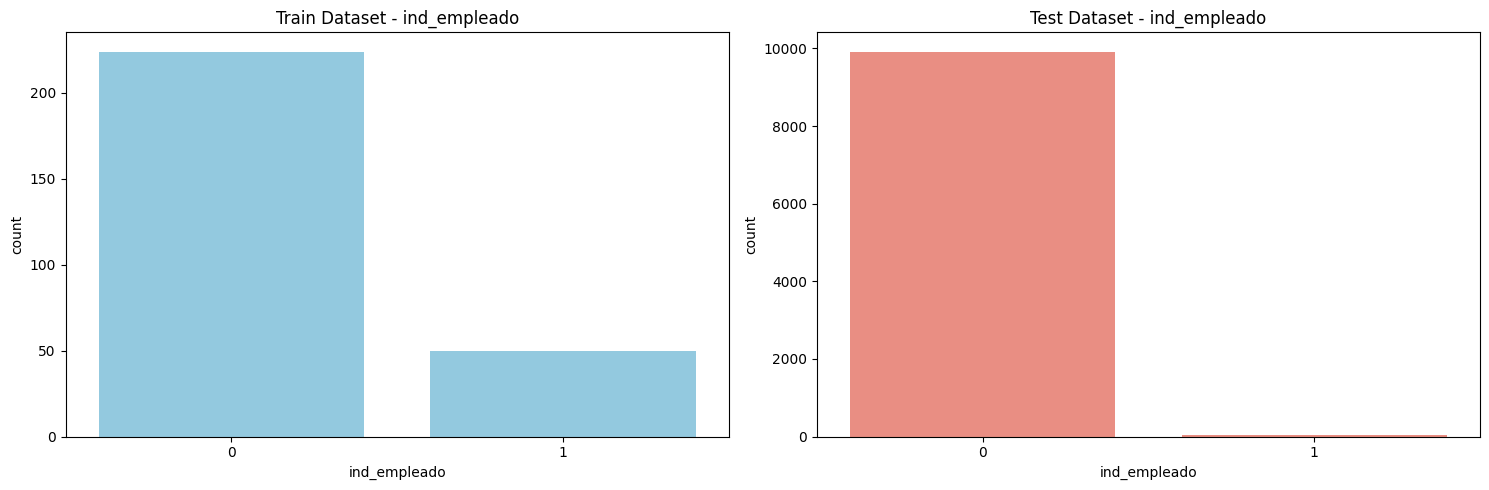

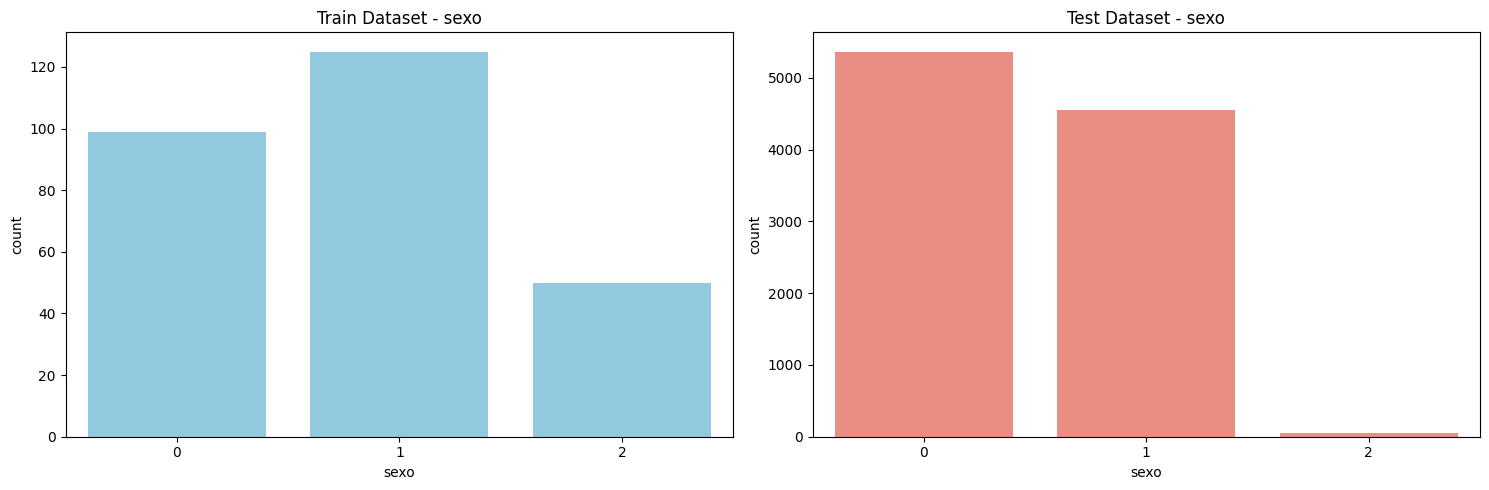

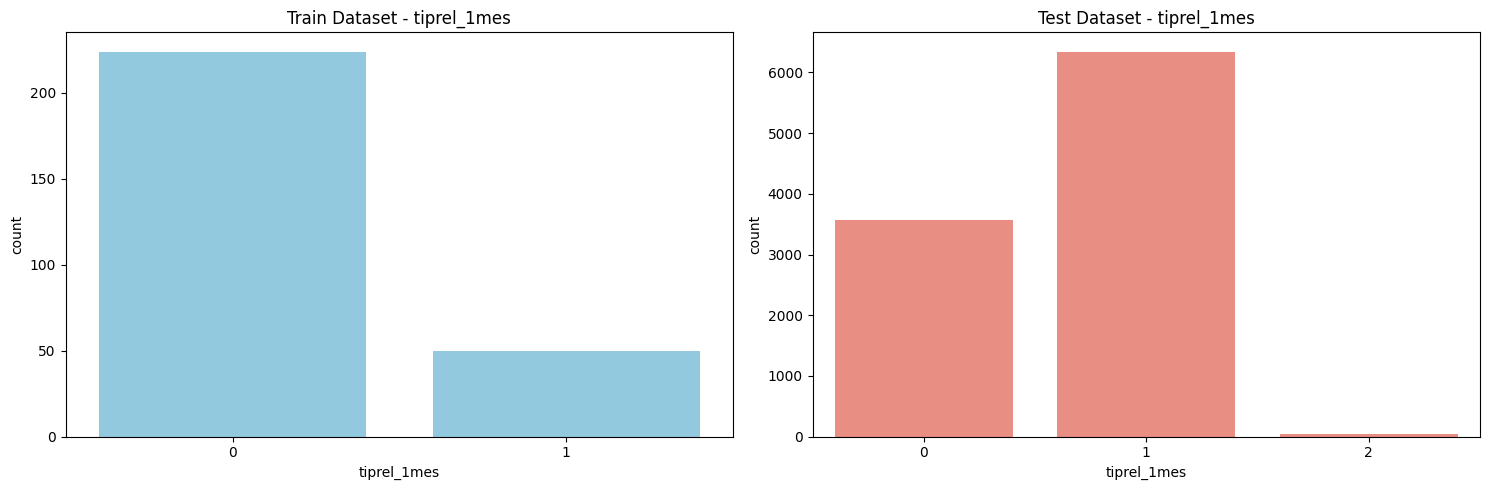

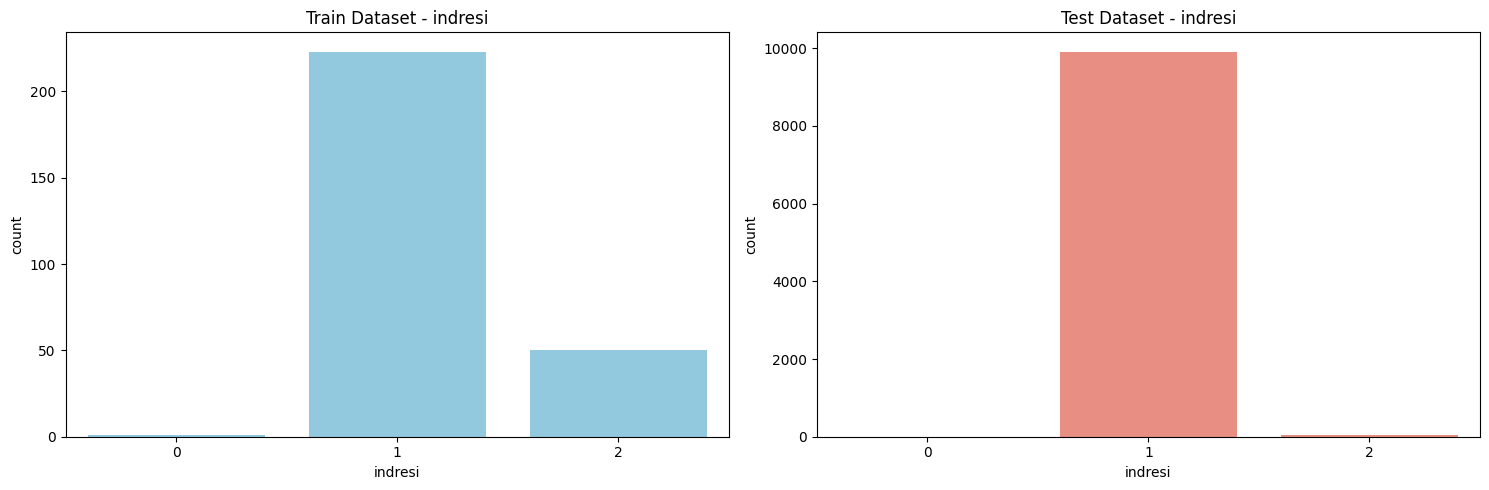

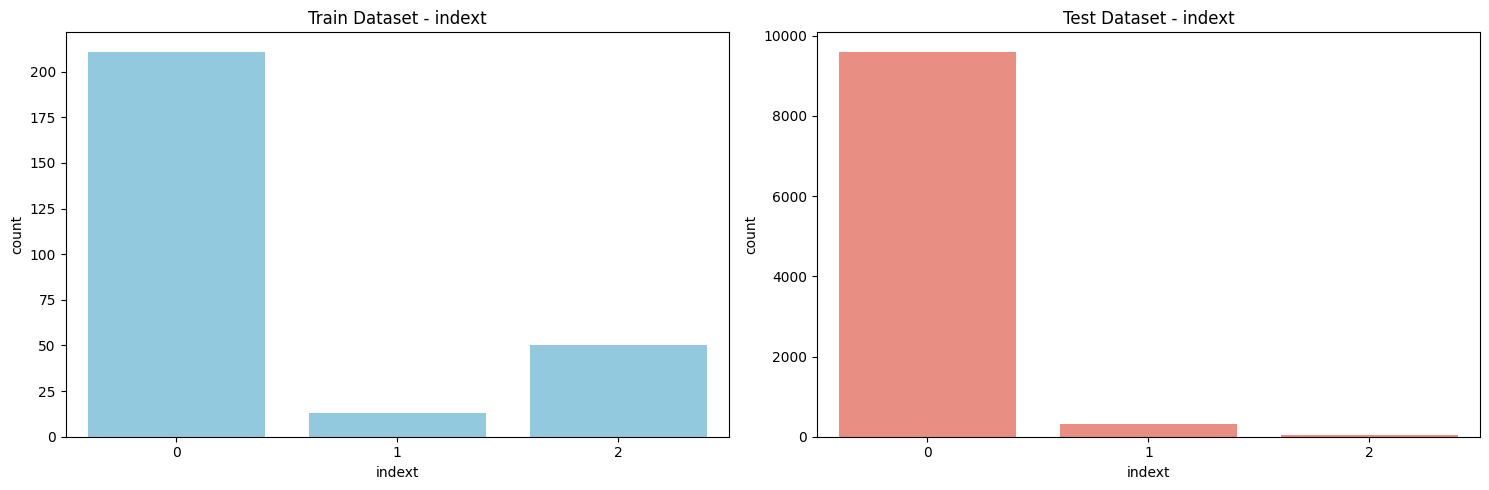

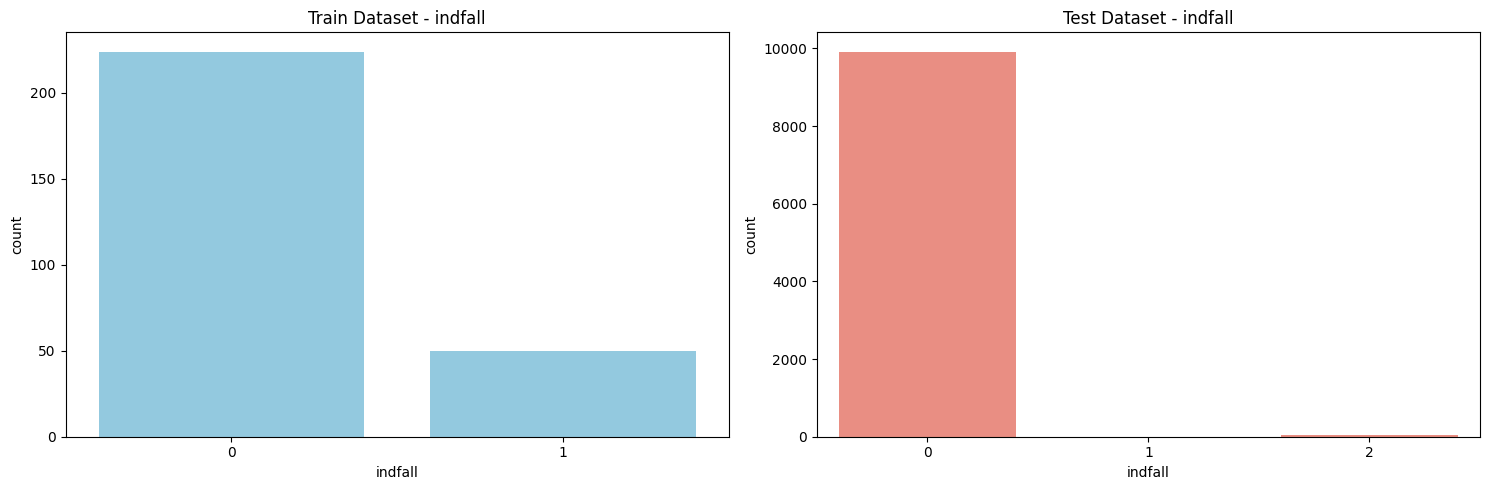

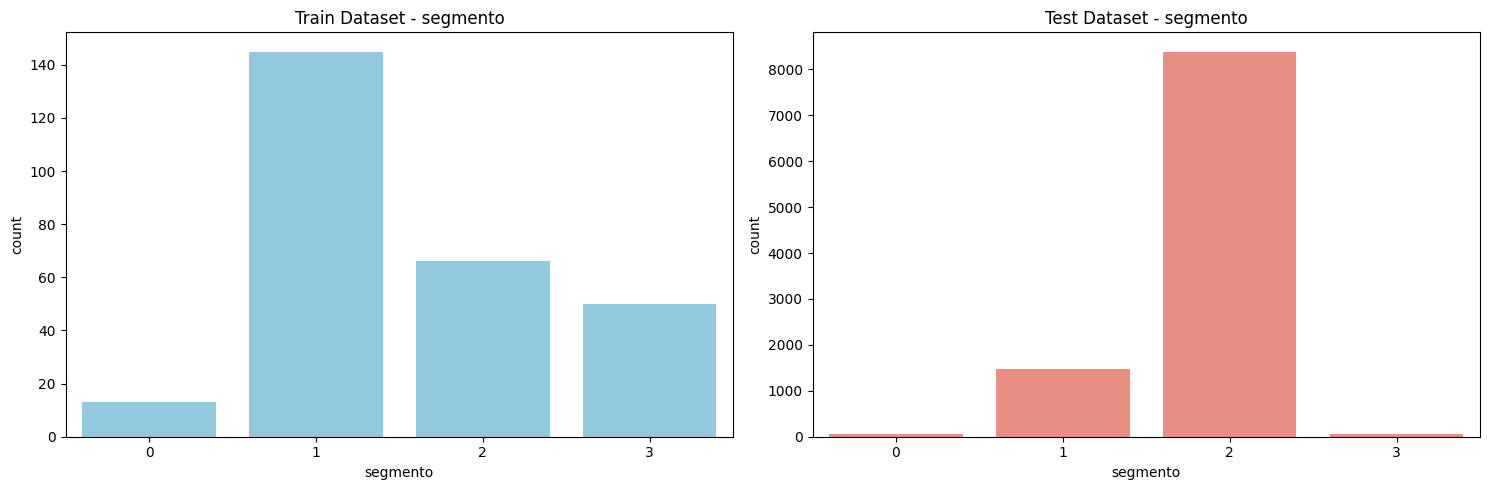

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define categorical columns and their values for train and test datasets
categorical_columns = ['ind_empleado','sexo', 'tiprel_1mes', 'indresi',
                       'indext', 'indfall', 'segmento']

# Define colors for train and test datasets
train_color = 'skyblue'
test_color = 'salmon'

# Plot each categorical column
for col in categorical_columns:
    # Create subplots for train and test datasets
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Train dataset
    sns.countplot(data=new_df, x=col, ax=axs[0], color=train_color)
    axs[0].set_title(f'Train Dataset - {col}')

    # Test dataset
    sns.countplot(data=new_dft, x=col, ax=axs[1], color=test_color)
    axs[1].set_title(f'Test Dataset - {col}')

    plt.tight_layout()
    plt.show()


In [ ]:
### XGBOOST Section

In [ ]:
# Separate features and target variable
target_variable_train = 'checked_services'
target_variable_test = 'checked_services'

X_train = new_df.drop(columns=[target_variable_train])
y_train = new_df[target_variable_train]

X_test = new_dft.drop(columns=[target_variable_test])
y_test = new_dft[target_variable_test]

# Clean and convert 'age' column to numeric, handle non-numeric values
X_train['age'] = pd.to_numeric(X_train['age'], errors='coerce')
X_test['age'] = pd.to_numeric(X_test['age'], errors='coerce')

# Fill NaN values
X_train['age'] = X_train['age'].fillna(X_train['age'].median())
X_test['age'] = X_test['age'].fillna(X_test['age'].median())

# Select numeric and categorical columns
numeric_columns_train = X_train.select_dtypes(include=['int', 'float']).columns
categorical_columns_train = X_train.select_dtypes(include=['object', 'category']).columns

numeric_columns_test = X_test.select_dtypes(include=['int', 'float']).columns
categorical_columns_test = X_test.select_dtypes(include=['object', 'category']).columns

# Ensure that all remaining columns in the train set are numeric or categorical
numeric_df_train = X_train[numeric_columns_train]
categorical_df_train = X_train[categorical_columns_train]

# Ensure that all remaining columns in the test set are numeric or categorical
numeric_df_test = X_test[numeric_columns_test]
categorical_df_test = X_test[categorical_columns_test]

# If categorical columns still exist, you may need to encode them for both train and test sets
if not categorical_df_train.empty:
    # Perform encoding for categorical columns in the train set
    categorical_df_train = pd.get_dummies(categorical_df_train)

# If categorical columns still exist, you may need to encode them for the test set
if not categorical_df_test.empty:
    # Perform encoding for categorical columns in the test set
    categorical_df_test = pd.get_dummies(categorical_df_test)

# Concatenate numeric and encoded categorical columns for the train set
X_train_processed = pd.concat([numeric_df_train, categorical_df_train], axis=1)

# Concatenate numeric and encoded categorical columns for the test set
X_test_processed = pd.concat([numeric_df_test, categorical_df_test], axis=1)

# Ensure the train and test sets have the same columns
common_features = list(set(X_train_processed.columns).intersection(X_test_processed.columns))

X_train_filtered = X_train_processed[common_features]
X_test_filtered = X_test_processed[common_features]

print(X_train_filtered.head())
print(X_test_filtered.head())

     nomprov_AVILA  nomprov_GIRONA   age  indrel_1mes  fecha_alta_2012-08-23  \
68           False           False  30.0          1.0                  False   
69           False           False  31.0          1.0                  False   
72           False           False  39.0          1.0                  False   
121          False           False  33.0          1.0                  False   
187          False           False  31.0          1.0                  False   

     fecha_alta_2012-08-24  ind_nomina_ult1  fecha_alta_2012-08-13  \
68                   False              0.0                  False   
69                   False              0.0                  False   
72                   False              1.0                  False   
121                  False              1.0                  False   
187                  False              1.0                  False   

     pais_residencia  fecha_alta_2012-08-28  ...  ind_actividad_cliente  \
68                 1   

In [ ]:
print("Number of features used during training:", len(X_train.columns))
print("Number of columns in the test dataset:", X_test.shape[1])

Number of features used during training: 46
Number of columns in the test dataset: 46


In [ ]:
print("Columns in X_train after preprocessing:", X_train.columns)
print("Columns in X_test:", X_test.columns)

Columns in X_train after preprocessing: Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes',
       'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall',
       'tipodom', 'cod_prov', 'nomprov', 'ind_actividad_cliente', 'renta',
       'segmento', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1',
       'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1'],
      dtype='object')
Columns in X_test: Index(['fecha_dato', 'ncodpers', 'ind_emplead

In [ ]:
common_features = list(set(X_train.columns).intersection(X_test.columns))

X_train_filtered = X_train[common_features]
X_test_filtered = X_test[common_features]

print(X_train_filtered.head())
print(X_test_filtered.head())

      age  ind_deco_fin_ult1  indrel_1mes  indresi  sexo  ind_hip_fin_ult1  \
68   30.0                0.0          1.0        1     0               0.0   
69   31.0                0.0          1.0        1     0               0.0   
72   39.0                0.0          1.0        1     1               0.0   
121  33.0                0.0          1.0        1     0               0.0   
187  31.0                0.0          1.0        1     1               0.0   

     ind_plan_fin_ult1  ind_nomina_ult1         nomprov  pais_residencia  ...  \
68                 0.0              0.0  BALEARS, ILLES                1  ...   
69                 0.0              0.0      VALLADOLID                1  ...   
72                 0.0              1.0  BALEARS, ILLES                1  ...   
121                0.0              1.0        VALENCIA                1  ...   
187                0.0              1.0          MADRID                1  ...   

     ind_deme_fin_ult1  antiguedad  indfall 

In [ ]:
object_columns_train = X_train_filtered.select_dtypes(include=['object']).columns
object_columns_test = X_test_filtered.select_dtypes(include=['object']).columns

print("Object columns in X_train_filtered:")
print(X_train_filtered[object_columns_train].head())

print("Object columns in X_test_filtered:")
print(X_test_filtered[object_columns_test].head())


Object columns in X_train_filtered:
            nomprov  fecha_dato  fecha_alta
68   BALEARS, ILLES  2015-01-28  2012-08-10
69       VALLADOLID  2015-01-28  2012-08-10
72   BALEARS, ILLES  2015-01-28  2012-08-10
121        VALENCIA  2015-01-28  2012-08-10
187          MADRID  2015-01-28  2012-08-10
Object columns in X_test_filtered:
       nomprov  fecha_dato  fecha_alta
0       MALAGA  2015-01-28  2015-01-12
1  CIUDAD REAL  2015-01-28  2012-08-10
2  CIUDAD REAL  2015-01-28  2012-08-10
3     ZARAGOZA  2015-01-28  2012-08-10
4     ZARAGOZA  2015-01-28  2012-08-10


In [ ]:
X_train_filtered['nomprov'] = X_train_filtered['nomprov'].astype('category')
X_test_filtered['nomprov'] = X_test_filtered['nomprov'].astype('category')

In [ ]:
# Convert date columns to datetime
X_train_filtered['fecha_dato'] = pd.to_datetime(X_train_filtered['fecha_dato'])
X_train_filtered['fecha_alta'] = pd.to_datetime(X_train_filtered['fecha_alta'])
X_test_filtered['fecha_dato'] = pd.to_datetime(X_test_filtered['fecha_dato'])
X_test_filtered['fecha_alta'] = pd.to_datetime(X_test_filtered['fecha_alta'])

# Extract features from dates
X_train_filtered['fecha_dato_year'] = X_train_filtered['fecha_dato'].dt.year
X_train_filtered['fecha_dato_month'] = X_train_filtered['fecha_dato'].dt.month
X_train_filtered['fecha_dato_day'] = X_train_filtered['fecha_dato'].dt.day
X_train_filtered['fecha_alta_year'] = X_train_filtered['fecha_alta'].dt.year
X_train_filtered['fecha_alta_month'] = X_train_filtered['fecha_alta'].dt.month
X_train_filtered['fecha_alta_day'] = X_train_filtered['fecha_alta'].dt.day

X_test_filtered['fecha_dato_year'] = X_test_filtered['fecha_dato'].dt.year
X_test_filtered['fecha_dato_month'] = X_test_filtered['fecha_dato'].dt.month
X_test_filtered['fecha_dato_day'] = X_test_filtered['fecha_dato'].dt.day
X_test_filtered['fecha_alta_year'] = X_test_filtered['fecha_alta'].dt.year
X_test_filtered['fecha_alta_month'] = X_test_filtered['fecha_alta'].dt.month
X_test_filtered['fecha_alta_day'] = X_test_filtered['fecha_alta'].dt.day

# Drop original date columns
X_train_filtered.drop(columns=['fecha_dato', 'fecha_alta'], inplace=True)
X_test_filtered.drop(columns=['fecha_dato', 'fecha_alta'], inplace=True)


In [ ]:
import xgboost as xgb

try:
    train = xgb.DMatrix(X_train_filtered, label=y_train, enable_categorical=True)
    test = xgb.DMatrix(X_test_filtered, label=y_test, enable_categorical=True)
    print("DMatrix creation successful!")
except Exception as e:
    print(f"Error creating DMatrix: {e}")


DMatrix creation successful!


In [ ]:
# (Kept getting errors because the nomprov and fecha_columns were not converted)
# I do not know why, but I just did it individually to use the xgboost

In [ ]:
import numpy as np

print("Unique values in y_train:", np.unique(y_train))
y_train = y_train.astype(int)

Unique values in y_train: [ 5.  6.  7.  8.  9. 10.]


In [ ]:
# Subtract the minimum value from all the values in y_train to shift them to start from 0
y_train -= y_train.min()

# Print the unique values in y_train after the transformation
print("Unique values in y_train after transformation:", np.unique(y_train))

Unique values in y_train after transformation: [0 1 2 3 4 5]


In [ ]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer, f1_score

# Define the parameter grid
param_grid = {
    'xgbclassifier__learning_rate': [0.01, 0.05, 0.1],
    'xgbclassifier__max_depth': [3, 5, 7],
    'xgbclassifier__subsample': [0.6, 0.8, 1.0],
    'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
    'xgbclassifier__gamma': [0, 0.1, 0.2],
    'xgbclassifier__reg_alpha': [0, 0.1, 0.5],
    'xgbclassifier__reg_lambda': [0, 0.1, 0.5]
}

# Identify numerical and categorical columns
categorical_features = X_train_filtered.select_dtypes(include=['object', 'category']).columns
numerical_features = X_train_filtered.select_dtypes(include=['int', 'float']).columns

# Define preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)

# Create a pipeline with preprocessing and XGBoost
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgbclassifier', XGBClassifier(eval_metric='mlogloss'))  # Remove use_label_encoder
])

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Define scoring metric
scoring = make_scorer(f1_score, average='weighted')

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, n_iter=10,
                                   scoring=scoring, cv=cv, n_jobs=-1, random_state=42)

# Perform the random search
random_search.fit(X_train_filtered, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Initialize XGBoost model with the best hyperparameters
best_xgb_model = random_search.best_estimator_

# Make predictions on the test dataset
predictions = best_xgb_model.predict(X_test_filtered)

print("Best Hyperparameters:", best_params)
print("Predictions:", predictions)


Best Hyperparameters: {'xgbclassifier__subsample': 1.0, 'xgbclassifier__reg_lambda': 0.1, 'xgbclassifier__reg_alpha': 0.5, 'xgbclassifier__max_depth': 5, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__gamma': 0, 'xgbclassifier__colsample_bytree': 0.8}
Predictions: [0 0 0 ... 0 0 0]


In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# Assuming best_xgb_model is the pipeline with XGBClassifier
# Ensure X_test_filtered is a DataFrame
if not isinstance(X_test_filtered, pd.DataFrame):
    X_test_filtered = pd.DataFrame(X_test_filtered)

# Make predictions using the pipeline
predictions = best_xgb_model.predict(X_test_filtered)

print("Predictions:", predictions)


Predictions: [0 0 0 ... 0 0 0]


In [ ]:
# Make predictions on the test set
predictions = best_xgb_model.predict(X_test_filtered)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared
r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)


Mean Squared Error (MSE): 3.5761861771491623
Mean Absolute Error (MAE): 1.6349684020463437
R-squared: -2.3502098320896465


Top N Most Important Features:
ind_actividad_cliente: 0.14063723385334015
indrel_1mes: 0.11204744130373001
ind_nuevo: 0.10725051909685135
ind_recibo_ult1: 0.08675788342952728
ind_nom_pens_ult1: 0.0736551508307457
ind_nomina_ult1: 0.058276403695344925
ind_ecue_fin_ult1: 0.05300913006067276
ind_tjcr_fin_ult1: 0.04388168081641197
canal_entrada: 0.02627280168235302
renta: 0.025992324575781822


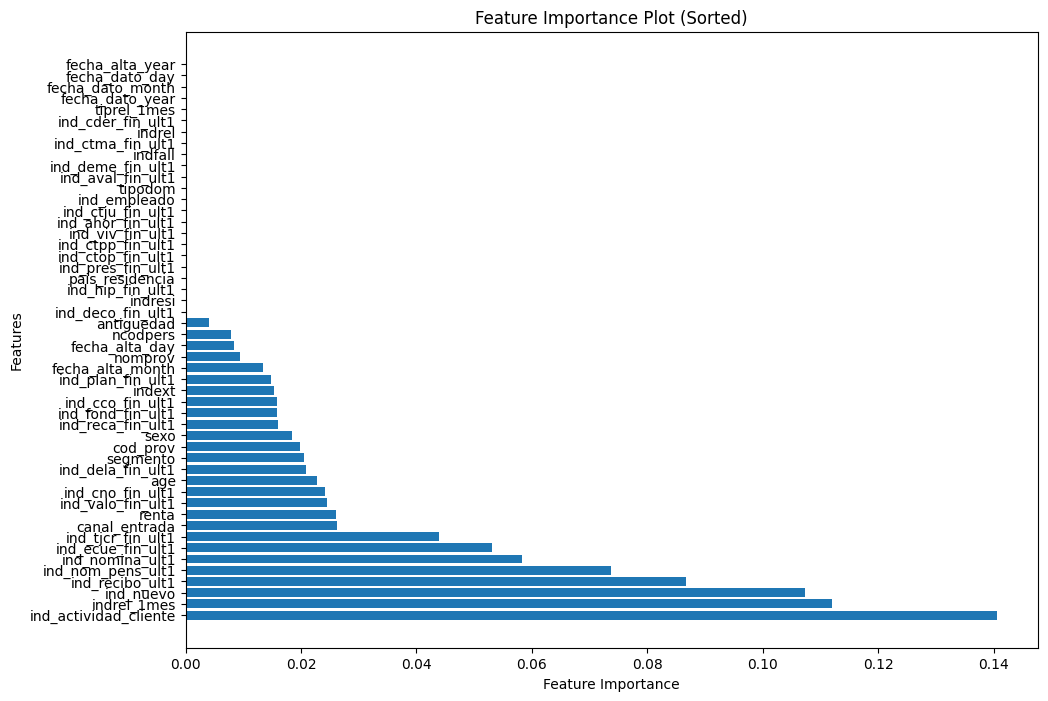

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the XGBRegressor model from the pipeline
xgb_model = best_xgb_model.named_steps['xgbclassifier']

# Get feature importance scores
feature_importance = xgb_model.feature_importances_

# Get feature names
feature_names = X_train_filtered.columns.tolist()

# Create a dictionary to store feature importance scores for each feature
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort feature importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Get sorted feature names and importance scores
sorted_feature_names = [feature[0] for feature in sorted_feature_importance]
sorted_feature_scores = [feature[1] for feature in sorted_feature_importance]

# Print the most important columns
print("Top N Most Important Features:")
top_n = 10  # Change this value to the number of top features you want to display
for name, score in sorted_feature_importance[:top_n]:
    print(f"{name}: {score}")

# Plot sorted feature importance
plt.figure(figsize=(11, 8))
plt.barh(sorted_feature_names, sorted_feature_scores)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot (Sorted)')
plt.show()


In [ ]:
# Load the sample submission file
sample_submission_path = "sample_submission(spr).csv.zip"
sample_submission = pd.read_csv(sample_submission_path)

# Check the length of the sample submission and the number of users in the dataset
print("Length of sample submission:", len(sample_submission))
print("Number of users in the dataset:", len(df_test))

# Ensure the lengths match by truncating or padding the predictions
if len(sample_submission) > len(df_test):
    # Truncate the sample submission to match the length of the test dataset
    sample_submission = sample_submission.iloc[:len(df_test)]
elif len(sample_submission) < len(df_test):
    # Pad the sample submission with empty predictions
    padding_length = len(df_test) - len(sample_submission)
    padding = pd.DataFrame({"ncodpers": [np.nan] * padding_length, "added_products": [""] * padding_length})
    sample_submission = pd.concat([sample_submission, padding], ignore_index=True)

# Save the corrected sample submission
sample_submission.to_csv("corrected_sample_submission.csv", index=False)


Length of sample submission: 929615
Number of users in the dataset: 10000


In [ ]:
## I think the issue for the sample submission is b ecuase the length is not the same
## Maybe add back the number of users, or hopefully decrease the length of sample submissions